In [1]:
import utils2 as ut
import numpy as np
import diff_eq as de
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import torch 

from tqdm import tqdm

In [2]:
de1 = de.create_exp(lamb=1)
#de1 = de.create_ho(omega=1)

In [3]:
Hs = [1, 2, 4, 8, 16, 32, 64]
Ks = [1, 2, 3, 4, 5, 6]

N_train = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]
n_epoch = 20000
lr = 5e-5

n_test = 10000
n_times = 1
optim_type = 'Adam'

In [4]:
Hs = Hs[5:6]
Ks = Ks[:1]
N_train = N_train[9:10]

100%|██████████| 1/1 [00:17<00:00, 17.86s/it]


n_train, k, h, error: 1024 1 32 1.6468684e-06


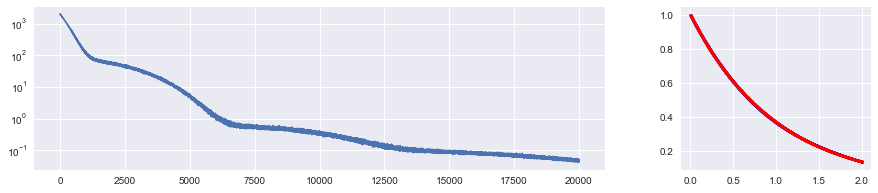

In [5]:
Error = np.zeros((len(N_train), len(Hs), len(Ks)))
for n_train in N_train:
    for k in Ks:
        for h in Hs:
            er = []
            tot_loss = []
            for n in tqdm(range(n_times)):
                seq = ut.build_nn(h, k)
                seq, loss = ut.train_nn(de1, seq, n_epoch, n_train, lr, optim_type=optim_type)
                t_test, x_pred, x_real, error = ut.test_nn(de1, seq, n_test)
                er.append(error.data.numpy())
                tot_loss.append(loss)
            er_mean = np.nanmean(er)
            loss_mean = np.nanmean(tot_loss, axis=0)
            print('n_train, k, h, error:', n_train, k, h, er_mean)
            f, (a0, a1) = plt.subplots(1,2, gridspec_kw = {'width_ratios':[3, 1]})
            f.set_figheight(3)
            f.set_figwidth(15)            
            a0.plot(loss_mean)
            a0.set_yscale('log')
            
            a1.scatter(t_test.data.numpy(), x_pred.data.numpy(), c='b', s=2)
            a1.scatter(t_test.data.numpy(), x_real.data.numpy(), c='r', s=2)            
            plt.show()

            
            Error[N_train.index(n_train)][Hs.index(h)][Ks.index(k)] = er_mean

In [6]:
#plt.plot(loss)
#plt.yscale('log')



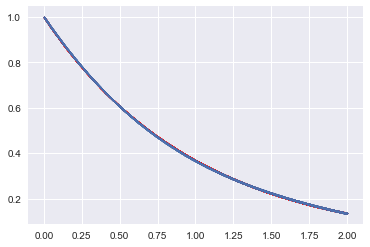

In [7]:
plt.scatter(t_test.data.numpy(), x_real.data.numpy(), c='r', s=1)
plt.scatter(t_test.data.numpy(), x_pred.data.numpy(), s=1)

In [8]:
Error[:, 0, 0]

array([1.64686844e-06])

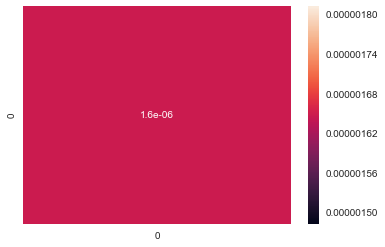

In [9]:
ax = sns.heatmap(Error[0, :, :], annot=True)

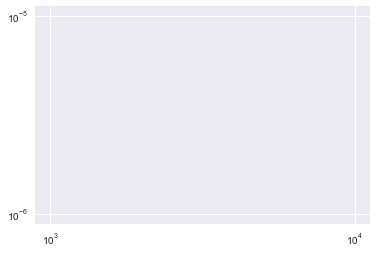

In [10]:
for i, h in enumerate(Hs):
    for j, k in enumerate(Ks):
        plt.plot(N_train, Error[:, j, i])
plt.xscale('log')
plt.yscale('log')
#ax = sns.heatmap(Error[:, :], annot=True)

In [11]:
interval_new=(0, 3)
de1.interval=interval_new
t_test = de1.create_points(n_test)
x_pred = de1.predict(t_test, seq)
x_real = de1.real(t_test)


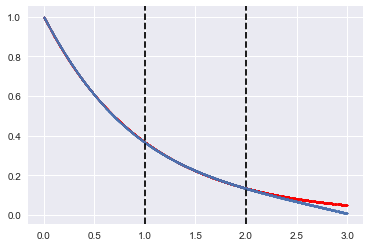

In [12]:
plt.scatter(t_test.data.numpy(), x_real.data.numpy(), c='r', s=1)
plt.scatter(t_test.data.numpy(), x_pred.data.numpy(), s=1)
plt.axvline(x=1, linestyle='--', c='k')
plt.axvline(x=2, linestyle='--', c='k')

#plt.ylim(-1, 2)